In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')
from pycaret.datasets import get_data

In [ ]:
df_train=pd.read_csv('/content/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test=pd.read_csv('/content/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
def describe_and_info(train, test):
    # Print descriptive statistics
    print("Train Descriptive Statistics:")
    print(train.describe())

    print("\nTest Descriptive Statistics:")
    print(test.describe())

    # Print DataFrame information
    print("\nTrain Information:")
    print(train.info())

    print("\nTest Information:")
    print(test.info())

    # Print count of missing values
    print("\nTrain Missing Values:")
    print(train.isna().sum())

    print("\nTest Missing Values:")
    print(test.isna().sum())

describe_and_info(df_train,df_test)

Train Descriptive Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Test Descriptive Statistics:
       PassengerId   

We notice large missing values of the Cabin feature, let's drop it from our two datasets.

In [ ]:
df_train.drop(columns=['Cabin'], inplace=True)
df_test.drop(columns=['Cabin'], inplace=True)

Age has some missing values in both test and train sets, however, Fare and Embarked have some in test and train respectivey.

In [ ]:
# Impute missing values for 'Age' with the median
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)

# Impute missing values for 'Fare' in the test set with the median
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)

# Impute missing values for 'Embarked' with the mode
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)


Let's explore relationships between variables and their impact on survival rate

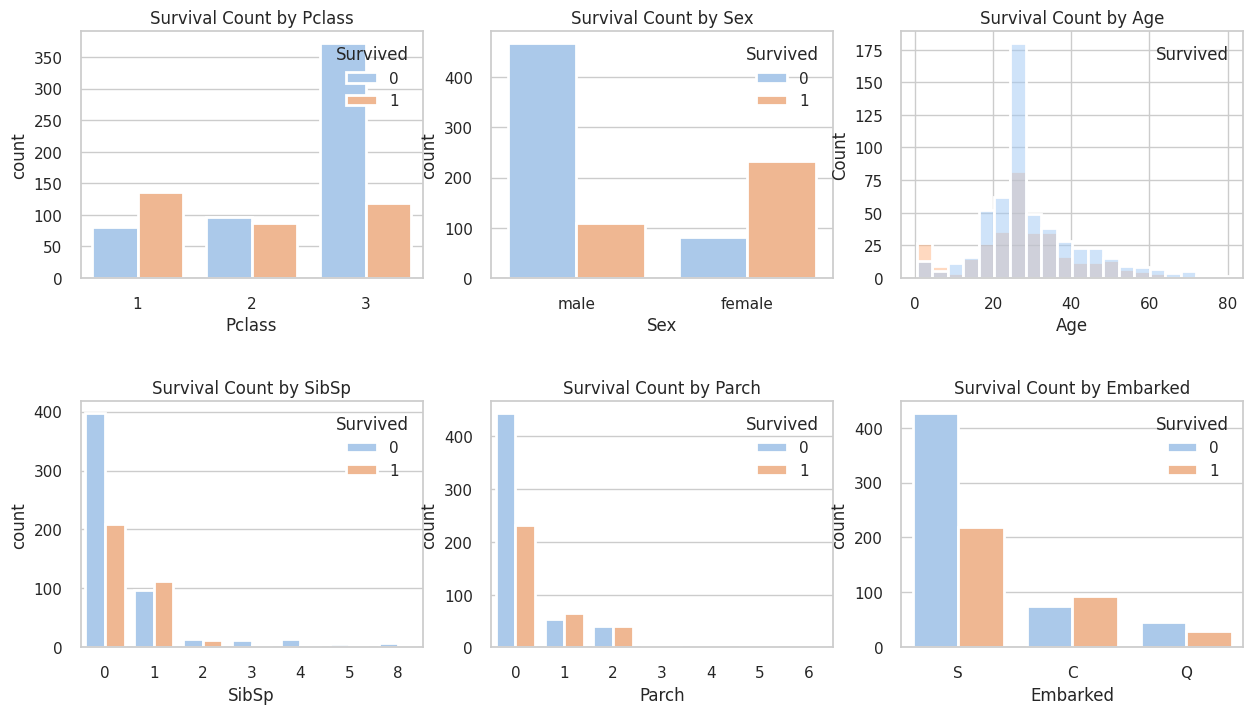

In [ ]:
def plot_features_with_survived(df_train):
    # Set a more visually appealing color palette
    sns.set_palette("pastel")

    # Set a different style for better aesthetics
    sns.set_style("whitegrid")

    # Define the features to plot
    features_to_plot = df_train.columns.drop(['PassengerId', 'Survived','Ticket','Fare','Name'])

    # Set up the grid layout
    rows = (len(features_to_plot) + 2) // 3
    fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4), dpi=100)
    fig.subplots_adjust(hspace=0.5)

    # Iterate through features and create plots
    for i, feature in enumerate(features_to_plot):
        row, col = i // 3, i % 3

        # Special handling for 'Age' plot to improve visibility
        if feature == 'Age':
            sns.histplot(x=feature, hue='Survived', data=df_train, ax=axes[row, col], bins=20, linewidth=2)
        else:
            sns.countplot(x=feature, hue='Survived', data=df_train, ax=axes[row, col], linewidth=2)

        axes[row, col].set_title(f'Survival Count by {feature}')
        axes[row, col].legend(title='Survived', loc='upper right')

    # Handle the case where the number of features is not a multiple of 3
    if len(features_to_plot) % 3 != 0:
        for j in range(len(features_to_plot) % 3, 3):
            fig.delaxes(axes[rows - 1, j])

    plt.show()

# Call the function with the training dataset
plot_features_with_survived(df_train)




All classes of our target variable are represented over all features variables

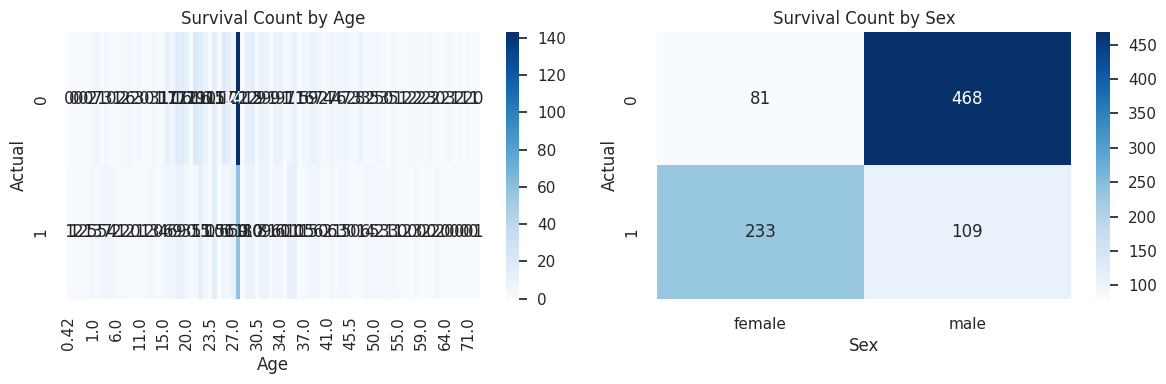

In [ ]:
from sklearn.metrics import confusion_matrix

df_confusion = df_train[['Survived', 'Sex', 'Age']].copy()

# Create a confusion matrix-like DataFrame for age
conf_matrix_age = pd.crosstab(df_confusion['Survived'], df_confusion['Age'], rownames=['Actual'], colnames=['Age'])

# Create a confusion matrix-like DataFrame for sex
conf_matrix_sex = pd.crosstab(df_confusion['Survived'], df_confusion['Sex'], rownames=['Actual'], colnames=['Sex'])

# Plot the heatmap for age
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_age, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Survival Count by Age')

# Plot the heatmap for sex
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_sex, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Survival Count by Sex')

plt.tight_layout()
plt.show()

Imbalanced data for survived people count by sex.
Large speetrum of survival count by age.

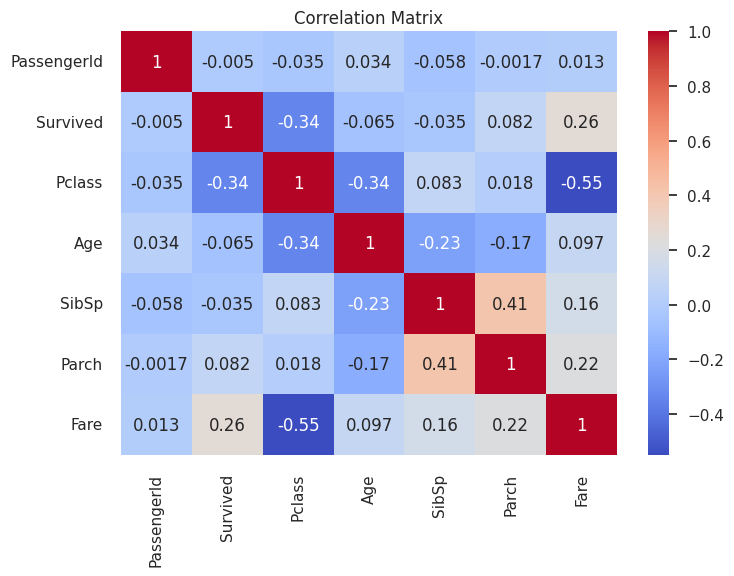

In [ ]:
correlation_matrix = df_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

All remained features are correlated with our target vraiable survived

* Feature Engineering

In [ ]:
# Assuming 'SibSp' and 'Parch' represent family size, create a new feature 'FamilySize'
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

* Encode Categorical Variables

In [ ]:
# Convert categorical variables into numerical format using one-hot encoding
df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked','FamilySize'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Sex', 'Embarked','FamilySize'], drop_first=True)

* Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_train[['Age', 'Fare']] = scaler.fit_transform(df_train[['Age', 'Fare']])
df_test[['Age', 'Fare']] = scaler.transform(df_test[['Age', 'Fare']])

Drop unnecessary data: Name and ticket do not have any utility to predict the survived over the test set.

In [ ]:
df_train.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
df_test.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
!pip install pycaret[full]

In [ ]:
# let's double ckeck the Pycaret version:
from pycaret.utils import version
version()

'3.2.0'

In [ ]:
from pycaret.classification import *

In [ ]:
exp1=ClassificationExperiment()
exp1.setup(df_train, target='Survived', preprocess=True, fold_strategy='stratifiedkfold', session_id=555)

,Description,Value
0,Session id,555
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 18)"
4,Transformed data shape,"(891, 18)"
5,Transformed train set shape,"(623, 18)"
6,Transformed test set shape,"(268, 18)"
7,Numeric features,17
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model = exp1.compare_models(sort='Accuracy', n_select=1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7961,0.8424,0.6736,0.7736,0.7157,0.5585,0.5657,0.4460
catboost,CatBoost Classifier,0.7944,0.8485,0.6569,0.7744,0.7071,0.5513,0.5586,2.0130
rf,Random Forest Classifier,0.7896,0.8474,0.6652,0.7616,0.7075,0.5447,0.5500,0.5950
lr,Logistic Regression,0.7848,0.8349,0.6902,0.7329,0.7097,0.5392,0.5408,1.3240
xgboost,Extreme Gradient Boosting,0.7848,0.8355,0.6819,0.7408,0.7078,0.5383,0.5416,0.1480
ridge,Ridge Classifier,0.7784,0.0000,0.6652,0.7312,0.6950,0.5221,0.5246,0.1040
lda,Linear Discriminant Analysis,0.7784,0.8333,0.6694,0.7293,0.6963,0.5229,0.5252,0.1120
lightgbm,Light Gradient Boosting Machine,0.7769,0.8357,0.6446,0.7412,0.6869,0.5155,0.5205,0.4210
et,Extra Trees Classifier,0.7703,0.8408,0.6696,0.7158,0.6901,0.5083,0.5106,0.4110
ada,Ada Boost Classifier,0.7607,0.7983,0.6654,0.7025,0.6806,0.4900,0.4931,0.2350


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

We've got rf, gbc and lr as the best three models, let's estimate other advance pycaret techniques using these top three models

In [ ]:
# Create GBC model
gbc_model = exp1.create_model('gbc')

# Create LR model for stacking and blending
lr_model = exp1.create_model('lr')

# Create RF model for stacking and blending
rf_model = exp1.create_model('rf')

#Tune models:
tuned_gbc_model = exp1.tune_model(gbc_model)
tuned_lr_model = exp1.tune_model(lr_model)
tuned_rf_model = exp1.tune_model(rf_model)

# Create stacking model
stacker = exp1.stack_models(estimator_list=[tuned_gbc_model, tuned_lr_model, tuned_rf_model], meta_model=tuned_rf_model)

# Create blending model
blender = exp1.blend_models(estimator_list=[tuned_gbc_model, tuned_lr_model, tuned_rf_model])


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8254,0.9006,0.6250,0.8824,0.7317,0.6078,0.6277
1,0.8730,0.8654,0.7083,0.9444,0.8095,0.7172,0.7339
2,0.7143,0.7799,0.5833,0.6364,0.6087,0.3844,0.3853
3,0.7742,0.8410,0.6250,0.7500,0.6818,0.5090,0.5141
4,0.8871,0.8876,0.8750,0.8400,0.8571,0.7639,0.7643
5,0.7097,0.6584,0.5000,0.6667,0.5714,0.3586,0.3671
6,0.8548,0.8575,0.7500,0.8571,0.8000,0.6869,0.6906
7,0.7903,0.8706,0.6250,0.7895,0.6977,0.5405,0.5491
8,0.7581,0.8969,0.7917,0.6552,0.7170,0.5090,0.5159


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8095,0.9006,0.6667,0.8000,0.7273,0.5828,0.5885
1,0.8571,0.8547,0.7500,0.8571,0.8000,0.6897,0.6934
2,0.7619,0.7585,0.7083,0.6800,0.6939,0.4992,0.4995
3,0.7903,0.8629,0.7500,0.7200,0.7347,0.5615,0.5618
4,0.8226,0.9079,0.7500,0.7826,0.7660,0.6232,0.6236
5,0.6613,0.6162,0.4583,0.5789,0.5116,0.2577,0.2618
6,0.7581,0.8553,0.6667,0.6957,0.6809,0.4862,0.4865
7,0.8226,0.8695,0.7500,0.7826,0.7660,0.6232,0.6236
8,0.8065,0.8794,0.7500,0.7500,0.7500,0.5921,0.5921


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8254,0.9044,0.6667,0.8421,0.7442,0.6144,0.6240
1,0.8254,0.8600,0.6667,0.8421,0.7442,0.6144,0.6240
2,0.7937,0.7975,0.6250,0.7895,0.6977,0.5442,0.5528
3,0.7903,0.8476,0.6250,0.7895,0.6977,0.5405,0.5491
4,0.8548,0.9227,0.7917,0.8261,0.8085,0.6917,0.6921
5,0.6935,0.6815,0.5000,0.6316,0.5581,0.3284,0.3336
6,0.8226,0.8673,0.6667,0.8421,0.7442,0.6112,0.6209
7,0.7742,0.8904,0.7083,0.7083,0.7083,0.5241,0.5241
8,0.7742,0.8805,0.7500,0.6923,0.7200,0.5313,0.5325


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8730,0.9188,0.7500,0.9000,0.8182,0.7219,0.7289
1,0.7937,0.8333,0.6250,0.7895,0.6977,0.5442,0.5528
2,0.7778,0.7853,0.6667,0.7273,0.6957,0.5212,0.5224
3,0.8065,0.8180,0.6250,0.8333,0.7143,0.5724,0.5860
4,0.8548,0.9254,0.8333,0.8000,0.8163,0.6964,0.6968
5,0.6774,0.6601,0.5000,0.6000,0.5455,0.2986,0.3016
6,0.8226,0.8827,0.7500,0.7826,0.7660,0.6232,0.6236
7,0.8065,0.8914,0.7500,0.7500,0.7500,0.5921,0.5921
8,0.8226,0.8871,0.7500,0.7826,0.7660,0.6232,0.6236


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7937,0.8974,0.6250,0.7895,0.6977,0.5442,0.5528
1,0.8254,0.8494,0.6667,0.8421,0.7442,0.6144,0.6240
2,0.7619,0.7479,0.6250,0.7143,0.6667,0.4828,0.4854
3,0.8226,0.8783,0.6667,0.8421,0.7442,0.6112,0.6209
4,0.8548,0.9243,0.7500,0.8571,0.8000,0.6869,0.6906
5,0.6613,0.6272,0.4167,0.5882,0.4878,0.2457,0.2538
6,0.7903,0.8388,0.6667,0.7619,0.7111,0.5477,0.5507
7,0.8548,0.8695,0.7500,0.8571,0.8000,0.6869,0.6906
8,0.8065,0.8750,0.7083,0.7727,0.7391,0.5857,0.5871


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7937,0.8803,0.5833,0.8235,0.6829,0.5365,0.5540
1,0.8571,0.8590,0.6250,1.0000,0.7692,0.6736,0.7126
2,0.7778,0.7778,0.5833,0.7778,0.6667,0.5051,0.5168
3,0.8065,0.8991,0.5833,0.8750,0.7000,0.5654,0.5908
4,0.9032,0.9320,0.8333,0.9091,0.8696,0.7929,0.7948
5,0.7258,0.6568,0.4167,0.7692,0.5405,0.3689,0.4041
6,0.8226,0.8536,0.6667,0.8421,0.7442,0.6112,0.6209
7,0.8387,0.8651,0.7083,0.8500,0.7727,0.6493,0.6558
8,0.7742,0.8827,0.6667,0.7273,0.6957,0.5167,0.5179


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7937,0.8686,0.5833,0.8235,0.6829,0.5365,0.5540
1,0.8413,0.8830,0.6667,0.8889,0.7619,0.6465,0.6615
2,0.7619,0.7553,0.5833,0.7368,0.6512,0.4741,0.4816
3,0.8226,0.8794,0.6667,0.8421,0.7442,0.6112,0.6209
4,0.8387,0.9167,0.8333,0.7692,0.8000,0.6652,0.6667
5,0.6613,0.6530,0.4167,0.5882,0.4878,0.2457,0.2538
6,0.8226,0.8575,0.7083,0.8095,0.7556,0.6173,0.6207
7,0.8226,0.8849,0.7083,0.8095,0.7556,0.6173,0.6207
8,0.7903,0.8991,0.6667,0.7619,0.7111,0.5477,0.5507


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.9124,0.7083,0.8947,0.7907,0.6845,0.6952
1,0.8254,0.8568,0.6667,0.8421,0.7442,0.6144,0.6240
2,0.7937,0.7810,0.6250,0.7895,0.6977,0.5442,0.5528
3,0.8226,0.8783,0.6250,0.8824,0.7317,0.6049,0.6249
4,0.8548,0.9375,0.8333,0.8000,0.8163,0.6964,0.6968
5,0.6774,0.6458,0.4583,0.6111,0.5238,0.2874,0.2942
6,0.8387,0.8783,0.7083,0.8500,0.7727,0.6493,0.6558
7,0.8387,0.8871,0.7500,0.8182,0.7826,0.6548,0.6564
8,0.8226,0.9068,0.7500,0.7826,0.7660,0.6232,0.6236


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

The best model is the blender

Plot

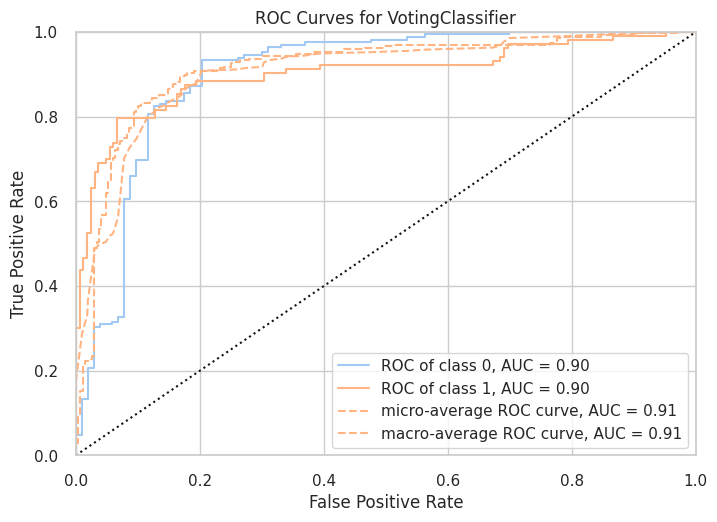

In [ ]:
exp1.plot_model(blender)

Model performing better than random prediction (no skill)

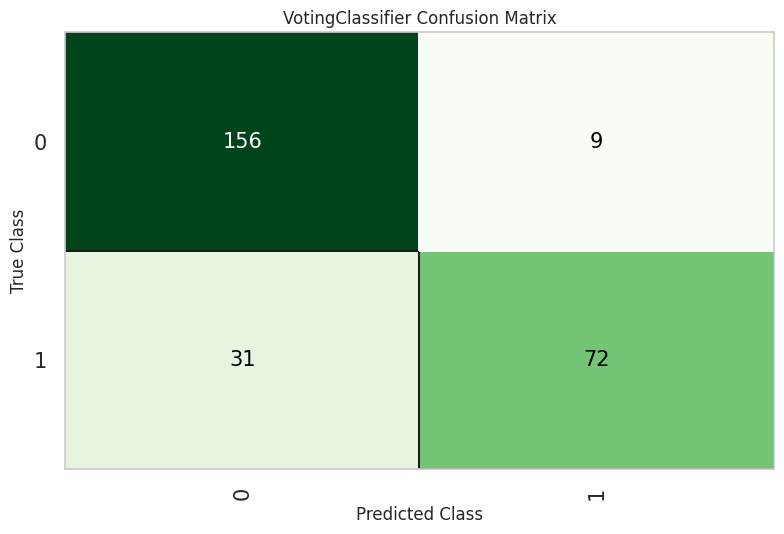

In [ ]:
exp1.plot_model(blender, plot='confusion_matrix')

Relatively low FTP and FTN

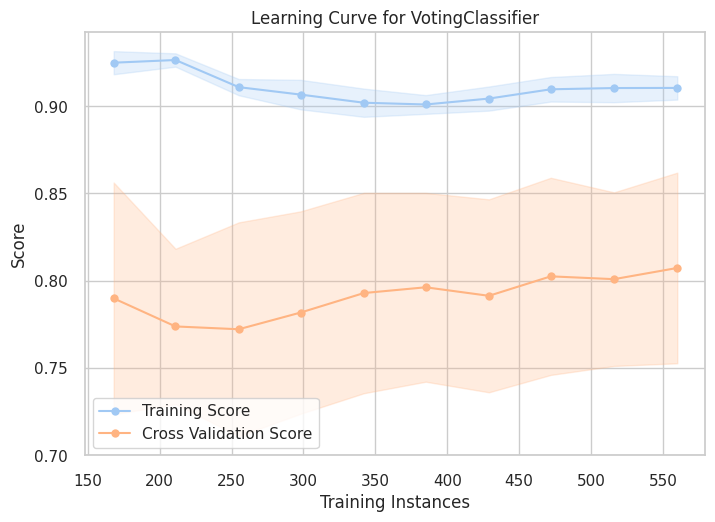

In [ ]:
exp1.plot_model(blender, plot='learning')

Need more observations to see how does the gap look like

In [ ]:
# Make predictions on the test set
predictions = exp1.predict_model(blender, data=df_test)

# Extract PassengerId and predicted labels
submission_data = pd.DataFrame({'PassengerId': predictions['PassengerId'], 'Survived': predictions['prediction_label']})
submission_data.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [ ]:
submission_data.shape

(418, 2)

In [ ]:
# Save the submission DataFrame to a CSV file
submission_data.to_csv('submission_data.csv', index=False)